In [1]:
## Minimizing a simple but non-convex cost function using Gradient Descent
## Code below shows how to use it for minimizing a cost function sin(w**2+w**3)
## with a couple of initial values

## For all the examples, you should be able to replace import 'import yodf as tf' with
## 'import tensorflow as tf' and get identical results
## Just that, interface is similar to Tensorflow 1.* and not Tensorflow 2.*

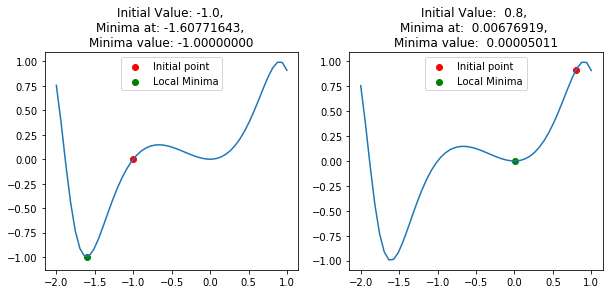

In [2]:
import numpy as np
import yodf as tf
import matplotlib.pyplot as plt
%matplotlib inline

def f(w):
    return np.sin(np.power(w, 2) + np.power(w, 3))

def model(initial_value, learning_rate=0.02, iterations=100):
    w = tf.Variable(initial_value)
    cost = tf.sin(w**2 + w**3)

    train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

    with tf.Session() as s:
        s.run(tf.global_variables_initializer())
        for _ in range(iterations):
            cost_final, _, w_final = s.run([cost, train, w])
    return w_final, cost_final

initial_values = (-1., 0.8)
plt.figure(figsize=(10,4))
for i in range(len(initial_values)):
    iv = initial_values[i]
    plt.subplot(1, 2, i+1)
    w_final, cost_final = model(iv)
    title = f"Initial Value: {iv:>4.1f}, \nMinima at: {w_final:>11.8f}, \nMinima value: {cost_final:>11.8f}"
    x = np.linspace(-2, 1)
    plt.title(title)
    plt.plot(x, f(x))
    plt.scatter(iv, f(iv), color='r', label='Initial point')
    plt.scatter(w_final, f(w_final), color='g', label='Local Minima')
    plt.legend(loc="upper center")
plt.show()